# 0. 載入套件

In [1]:
### packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

#time
import time

#install scipy
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

#data visualization
import seaborn as sns
#R packages

#import rpy2.robjects as robjects

#pingouin
import pingouin as pi

%matplotlib inline

# 1. 設定資料夾路徑

In [64]:
# data path
year=input('Year:')
path = './'+year+'/'
print("Path:",path)

Year: 2019


Path: ./2019/


# 2. 資料讀取與檢查

In [65]:
# file list and data head
import glob
import re
import sys
import xlrd

from datetime import datetime as dt
from sys import argv, stdout as cout
from time import sleep as sl

import warnings
warnings.filterwarnings("ignore")

pd.options.display.encoding = sys.stdout.encoding

files = [f for f in glob.glob(path + "**/*.csv", recursive=True)]



print('----------------------------------------------------------------------------------------------------------------------------')
print('|| File list ||                                                                                        || Total files:',len(files),'||')
print('''----------------------------------------------------------------------------------------------------------------------------


''')

data_list={}
range_list={}

print("Loading and Processing...")
time1=time.time()
#print(time1)

for i in range(len(files)):
    #print(files[i])
    f_app=0
    f_app=os.path.join(files[i])
    data_list[i]= pd.read_csv(f_app,engine='python',header=None)
    data_list[i]=data_list[i].drop(data_list[i].index[[0,1,2,3,4,5,6,7,-1,-2,-3,-4,-5,-6,-7,-8,-9]])
    data_list[i]=data_list[i].dropna(how='all', axis=1)
    data_list[i].columns=[x for x in range(len(data_list[i].columns))]
    data_list[i]=data_list[i].rename(index=int, columns={0:"Specification",1: "Max_sp", 2: "Max_sp_stroke",3:"reMax_sp"
                                                        ,4:"reMax_sp_stroke",5:"Resi",6:"Resi_stroke",7:"rResi",8:"rResi_stroke"})
    data_list[i]=data_list[i].reset_index(drop=True)
    for col in data_list[i].columns:
        data_list[i][col]=data_list[i][col].str.replace("*", '')
        data_list[i][col]=data_list[i][col].convert_objects(convert_numeric=True)
    range_list[i]=data_list[i].loc[[1,2],['Max_sp','reMax_sp','Resi','rResi']].fillna(0)
    percent= i/100
    goal=len(files)/100
    if i+1 == len(files):
        sys.stdout.write("\r{0}{1}".format("▉"*(int(percent * 100/ goal)-1) , '%.2f%%' % (100)))
        sys.stdout.flush()
    else:
        sys.stdout.write("\r{0}{1}".format("▉"*int(percent * 100/ goal) , '%.2f%%' % (percent * 100/ goal)))
        sys.stdout.flush()

print("[DONE]")
time.sleep(1)
print('''

File1:''',files[0],'''
''')

data_list[0].head(10)

----------------------------------------------------------------------------------------------------------------------------
|| File list ||                                                                                        || Total files: 833 ||
----------------------------------------------------------------------------------------------------------------------------



Loading and Processing...
▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉100.00%[DONE]


File1: ./2019\cs106004m1(1080313)#r10802086-p05-1.xls.csv 



,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Upper,144.0,NaN,144.0,NaN,50.0,NaN,50.0,2.000
2,Lower,96.0,NaN,96.0,NaN,NaN,NaN,NaN,1.500
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-1,114.5,1.995,113.2,2.001,44.1,2.001,47.3,1.503
5,2-1,118.7,1.991,117.1,2.000,44.9,2.000,48.2,1.506
6,3-1,111.2,1.999,110.8,2.000,43.2,2.000,48.4,1.957
7,4-1,120.1,1.999,114.8,2.000,39.1,2.000,42.4,1.508
8,5-1,118.0,1.999,114.5,2.000,38.8,2.000,43.8,1.504
9,6-1,115.1,2.001,115.1,2.001,42.3,2.001,50.5,1.980


# 3. 資料前處理與視覺化

----------------------------------------------------------------------------------------------------------------------------
|| Histogram plot and range ||                                                                        || Total files: 833 ||
----------------------------------------------------------------------------------------------------------------------------



Loading and Processing...
▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉100.00%[DONE]


File1: ./2019\cs106004m1(1080313)#r10802086-p05-1.xls.csv 

Y axis= Frequency


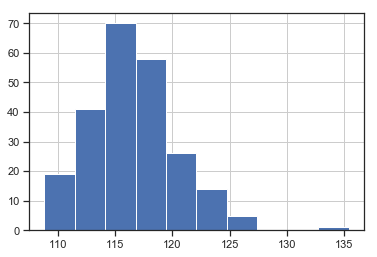

                 X axis= Spring (g)


In [66]:
# 先篩選數值型的欄位
print('----------------------------------------------------------------------------------------------------------------------------')
print('|| Histogram plot and range ||                                                                        || Total files:',len(data_list),'||')
print('''----------------------------------------------------------------------------------------------------------------------------


''')

dtype_select = [np.dtype('float64')]

df_final={}
out={}
noupper={}

print("Loading and Processing...")

for i in range(len(data_list)):
    df=data_list[i].iloc[4:,:]
    df2=df
    Range=range_list[i]
    numeric_columns = list(df.columns[list(df.dtypes.isin(dtype_select))])
    
    if len(data_list[i].columns)-1 == len(numeric_columns):
# 檢視這些欄位的數值範圍與直方圖
        output_data=[]
        output_range=[]
        outlier=[]
        for col in numeric_columns:
            #print('The range of',col,'in this file is between:',df[col].min(),"~",df[col].max())
            #print('The median of',col,'in this file is:',df[col].median())
            #df[col].hist()
            #plt.show()
            #print('''

            #''')
            # plot 2
            if col in Range:
                #upper=Range[col].max()
                upper=Range[col].iloc[0]
                #lower=Range[col].min()
                lower=Range[col].iloc[1]
                if Range[col].iloc[0] == 0:
                    noupper[i]=files[i]
                else:
                    pass
                df=df.loc[(df[col] < upper) & (df[col]> lower)]
                df=df.dropna(0)
                #print('After cleaning those outliers above & below than 20%, the range of this file is between:',df2.min(),'~',df2.max())
                #df2.hist(color='r')
                #plt.show()
                #print('''

                #''')
                #print('Removed:',len(out))
                #print('''

                #''')
                output_data.append(df)
            else:
                pass

        output_data=output_data[-1]
        output_data=pd.DataFrame(output_data)
        df_final[i]=output_data.dropna(0)
        outliers=[]
 # Note:從數值清單中拿出異常清單,把df_final裡符合異常清單的"值"計算zscore,再把異常清單的異常資料(已轉換為zscore)一筆一筆檢查是否大於3或小於-3,並確定這筆清單沒有重複出現在最終的outliers裡面
        for out_list in Range.columns:
            zscore=np.abs(stats.zscore(df_final[i][out_list]))
            for out_data in range(0,len(zscore)):
                if zscore[out_data] > 3 or zscore[out_data] < (-3):
                    if out_list not in outliers:
                        outliers.append(out_list)
        #print('''
        #''')
        #print('*****')
        #print('The number of columns that include ouliers:',len(outliers))
        #print('Potential outliers might exist in:',outliers)
        #print('''


#----------------------------------------------------------------------------------------------------------------------------''')    
    else:
        print('Some of columns might not be numeric data, please check the raw data again')

    percent= i/100
    goal=len(data_list)/100
    if i+1 == len(data_list):
        sys.stdout.write("\r{0}{1}".format("▉"*(int(percent * 100/ goal)-1) , '%.2f%%' % (100)))
        sys.stdout.flush()
    else:
        sys.stdout.write("\r{0}{1}".format("▉"*int(percent * 100/ goal) , '%.2f%%' % (percent * 100/ goal)))
        sys.stdout.flush()
        
print("[DONE]")
time.sleep(1)
print('''

File1:''',files[0],'''

Y axis= Frequency''')

df_final[0]['Max_sp'].hist()
plt.show()
print('                 X axis= Spring (g)')


#data_list[0].dropna(0)

In [67]:
outlier={}
for i in range(len(df_final)):
    outlier[i]=data_list[i][~data_list[i].apply(tuple,1).isin(df_final[i].apply(tuple,1))]
    percent= i/100
    goal=len(df_final)/100
    if i+1 == len(data_list):
        sys.stdout.write("\r{0}{1}".format("▉"*(int(percent * 100/ goal)-1) , '%.2f%%' % (100)))
        sys.stdout.flush()
    else:
        sys.stdout.write("\r{0}{1}".format("▉"*int(percent * 100/ goal) , '%.2f%%' % (percent * 100/ goal)))
        sys.stdout.flush()
        
print("[DONE]")

outlier[0].head()

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉100.00%[DONE]


,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Upper,144.0,NaN,144.0,NaN,50.0,NaN,50.0,2.00
2,Lower,96.0,NaN,96.0,NaN,NaN,NaN,NaN,1.50
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6-1,115.1,2.001,115.1,2.001,42.3,2.001,50.5,1.98


In [68]:
noupper

{}

In [69]:
###　良率
accuracy=[]
for i in range(len(df_final)):
    acc=(len(df_final[i])/len(data_list[i]))*100
    #print("The accuracy of file:",files[i],"is:",acc)
    acclist=[files[i].replace('./'+year+'\\',''),acc]
    accuracy.append(acclist)

accuracy=pd.DataFrame(accuracy,columns=['ID','accuracy'])
f_acc=accuracy.sort_values(by=['accuracy'],ascending=False)
f_acc['accuracy'].mean()

64.74970757471198

# 4. 合併所有files及顯示最大、最小值與眾數

In [70]:
print('This data list contain:',len(df_final),'files')
print('-------------------------------------------------------------------')

# check dataframe

frames=[]

print("Loading and Processing...")

for i in range(len(df_final)):
    frames.append(df_final[i])
    percent= i/100
    goal=len(df_final)/100
    if i+1 == len(df_final):
        sys.stdout.write("\r{0}{1}".format("▉"*(int(percent * 100/ goal)-1) , '%.2f%%' % (100)))
        sys.stdout.flush()
    else:    
        sys.stdout.write("\r{0}{1}".format("▉"*int(percent * 100/ goal) , '%.2f%%' % (percent * 100/ goal)))
        sys.stdout.flush()
        time.sleep(0.0001)
print("[DONE]")   
    
df=pd.concat(frames,axis=0)
df=df[['Max_sp','reMax_sp','Resi','rResi']]

print('''

''')
print('Range of total',len(frames),'files are between:')
print('''
''')
print(df.min())
print('~')
print(df.max())
print('-------------------------------------------------------------------')
print('Mode:',df.mode())

This data list contain: 833 files
-------------------------------------------------------------------
Loading and Processing...
▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉100.00%[DONE]



Range of total 833 files are between:


Max_sp      6.1
reMax_sp    6.0
Resi        3.4
rResi       4.6
dtype: float64
~
Max_sp      149.2
reMax_sp    148.8
Resi        486.6
rResi       499.9
dtype: float64
-------------------------------------------------------------------
Mode:    Max_sp  reMax_sp  Resi  rResi
0    30.0      29.3  35.5   49.7


# 5. 合併後的整體資料大小( 列數,行數 )

In [71]:
df.shape

(848918, 4)

# 6. 將所有的檔名合併回整體資料中

In [72]:
# bind with ID
filename = [f for f in glob.glob(path+"**/*.csv", recursive=True)]

file_list_id=[]
for f in filename:
    f=f.replace('./'+year+'\\','')
    file_list_id.append(f)

FINAL_ID={}

print("Loading and Processing...")

for i in range(len(df_final)):
    df_final[i]=df_final[i].dropna(how='all', axis=0).reset_index(drop=True)
    #print(len(df_final[i]))
    ID=pd.DataFrame([file_list_id[i]]*len(df_final[i]),columns=['ID'])
    FINAL_ID[i]=pd.concat([ID,df_final[i]],axis=1)
    percent= i/100
    goal=len(df_final)/100
    if i+1 == len(df_final):
        sys.stdout.write("\r{0}{1}".format("▉"*(int(percent * 100/ goal)-1) , '%.2f%%' % (100)))
        sys.stdout.flush()
    else:    
        sys.stdout.write("\r{0}{1}".format("▉"*int(percent * 100/ goal) , '%.2f%%' % (percent * 100/ goal)))
        sys.stdout.flush()

print("[DONE]")    
df2=pd.concat(FINAL_ID,axis=0)

Loading and Processing...
▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉100.00%[DONE]


# 7. 彈力最小值

In [73]:
sp_min=df2.loc[df2['Max_sp'] <= df2['Max_sp'].min()]
sp_min

ID Specification  \
98  203  de1-030de40-02a0(1080313)#r10802096-p05-1.xls.csv         216-1   
101 310  de1-030de40-02a0(1080313)#r10802096-p06-2.xls.csv         191-1   
    551  de1-030de40-02a0(1080313)#r10802096-p06-2.xls.csv         339-4   

         Max_sp  Max_sp_stroke  reMax_sp  reMax_sp_stroke   Resi  Resi_stroke  \
98  203     6.1          0.649       6.0            0.650   85.6        0.650   
101 310     6.1          0.651       6.1            0.651  123.7        0.651   
    551     6.1          0.651       6.1            0.645  126.8        0.651   

         rResi  rResi_stroke  
98  203  147.6         0.480  
101 310  166.2         0.483  
    551  174.5         0.559

# 8. 彈力最大值

In [74]:
sp_max=df2.loc[df2['Max_sp'] >= df2['Max_sp'].max()]
sp_max

,,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke
145,1067,de1-078bb23-01a0(1080423)#r10801138-p06-218pcs...,214-3,149.2,3.499,148.8,3.501,30.8,3.501,36.9,2.501


# 9. 阻值最小值

In [75]:
resis_min=df2.loc[df2['Resi'] <= df2['Resi'].min()]
resis_min

ID Specification  \
415 1031  de3-080dg24-01a0(1080321)#r10802039-p09-回測-1.x...         232-1   
    1035  de3-080dg24-01a0(1080321)#r10802039-p09-回測-1.x...         232-5   

          Max_sp  Max_sp_stroke  reMax_sp  reMax_sp_stroke  Resi  Resi_stroke  \
415 1031    91.4          0.495      91.2            0.500   3.4        0.500   
    1035    92.3          0.501      92.3            0.501   3.4        0.501   

          rResi  rResi_stroke  
415 1031    4.9         0.300  
    1035    4.6         0.301

# 10. 阻值最大值

In [76]:
resis_max=df2.loc[df2['Resi'] >= df2['Resi'].max()]
resis_max

,,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke
467,188,de5-075fg10-01a0(1080429)#r10804082-p04-2.xls.csv,58-4,28.1,1.658,25.7,1.7,486.6,1.7,499.6,1.606


# 11. Correlation

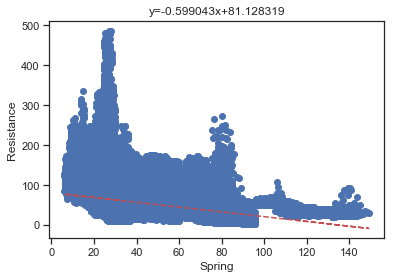

In [77]:
cor_df=df2[['Max_sp','Resi']]
#cor_df
x=df2[['Max_sp']].values
y=df2[['Resi']].values
plt.scatter(x, y)

plt.xlabel('Spring')
plt.ylabel('Resistance')

z = np.polyfit(x.flatten(), y.flatten(), 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("y=%.6fx+%.6f"%(z[0],z[1]))

plt.show()

In [78]:
stats.pearsonr(x, y)

(array([-0.26466174]), array([0.]))

# 12. Clustering

In [79]:
# dara
cor_data=df2[['Max_sp','Resi']].values
cluster_list=[]
for data in cor_data:
    cluster_list.append(data)
cluster_list=np.array(cluster_list)

In [80]:
# from sklearn import cluster, metrics

# # loop
# silhouette_avgs = []
# silhouette_list=[]
# ks = range(2, 11)
# for k in ks:
#     kmeans_fit = cluster.KMeans(n_clusters = k).fit(cluster_list)
#     print('Processing km')
#     cluster_labels = kmeans_fit.labels_
#     print('Processing label')
#     silhouette_avg = metrics.silhouette_score(cluster_list, cluster_labels,metric='euclidean')
#     print('Processing score')
#     silhouette_avgs.append(silhouette_avg)
#     combo=[k,silhouette_avg]
#     silhouette_list.append(combo)
#     percent= k/100
#     goal=len(df_final)/10
#     if k+1 == 9:
#         sys.stdout.write("\r{0}{1}".format("▉"*(int(percent * 100/ goal)-1) , '%.2f%%' % (100)))
#         sys.stdout.flush()
#     else:    
#         sys.stdout.write("\r{0}{1}".format("▉"*int(percent * 100/ goal) , '%.2f%%' % (percent * 100/ goal)))
#         sys.stdout.flush()
    
# plt.bar(ks, silhouette_avgs)
# plt.show()

# silhouette_list=pd.DataFrame(silhouette_list,columns=['ks','silhouette_avgs'])
# num_cluster=silhouette_list.loc[silhouette_list['silhouette_avgs']==silhouette_list['silhouette_avgs'].max(),['ks']]
# num_cluster['ks'].values[0]

# 13. 決定分群數量 (此時最好要有分散式運算來增加效率)

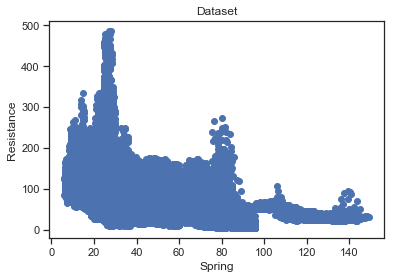

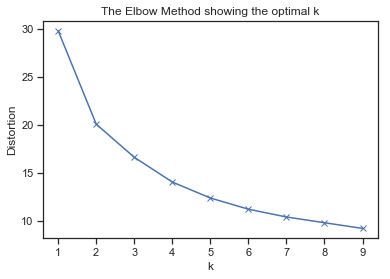

In [81]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


plt.plot()
plt.xlabel('Spring')
plt.ylabel('Resistance')
plt.title('Dataset')
plt.scatter(x, y)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x, y))).reshape(len(x), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [94]:
from sklearn import cluster, metrics
#kmeans_fit = cluster.KMeans(n_clusters = num_cluster['ks'].values[0]).fit(cluster_list)
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(cluster_list)
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")

分群結果：
[1 1 1 ... 1 0 0]
---


In [95]:
cluster_labels_df=pd.DataFrame(cluster_labels,columns=['cluster_labels'])
df3=df2.reset_index(drop=True)
cluster_result=pd.concat([df3,cluster_labels_df],axis=1)
cluster_result[['Max_sp','Resi','cluster_labels']].sort_values(by=['cluster_labels'],ascending=False)

,Max_sp,Resi,cluster_labels
350917,49.4,166.1,2
452318,27.6,191.8,2
75909,7.5,141.6,2
452326,25.5,207.5,2
75907,7.5,119.2,2
452325,25.4,205.1,2
452324,25.4,207.2,2
452323,25.3,193.1,2
452322,28.1,171.1,2
452321,28.0,169.9,2


In [96]:
cluster1=cluster_result.loc[cluster_result['cluster_labels']==0]
cluster1[['ID','Max_sp','Resi']].describe()

,Max_sp,Resi
count,218723.000000,218723.000000
mean,32.524517,80.212630
std,11.524020,14.632145
min,6.100000,58.700000
25%,25.400000,67.600000
50%,32.200000,77.200000
75%,35.200000,91.200000
max,141.000000,119.700000


In [98]:
cluster1.head()

,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke,cluster_labels
5847,cs106005m0(1080313)#r10802081-p06-320pcs.xls.csv,4-1,82.1,1.996,81.1,2.000,67.9,2.000,69.5,1.754,0
5849,cs106005m0(1080313)#r10802081-p06-320pcs.xls.csv,6-1,87.3,1.992,85.8,2.000,66.2,2.000,67.9,1.834,0
5851,cs106005m0(1080313)#r10802081-p06-320pcs.xls.csv,9-1,85.5,1.998,84.5,2.001,70.2,2.001,74.2,1.887,0
5852,cs106005m0(1080313)#r10802081-p06-320pcs.xls.csv,10-1,82.5,1.974,81.8,2.000,67.8,2.000,71.3,1.811,0
5854,cs106005m0(1080313)#r10802081-p06-320pcs.xls.csv,12-1,81.9,1.990,81.5,2.001,66.5,2.001,72.4,1.752,0


In [99]:
cluster2=cluster_result.loc[cluster_result['cluster_labels']==1]
cluster2[['ID','Max_sp','Resi']].describe()

,Max_sp,Resi
count,550417.000000,550417.000000
mean,36.683924,40.467197
std,16.911259,10.696997
min,10.900000,3.400000
25%,29.000000,32.800000
50%,30.600000,40.400000
75%,35.300000,48.700000
max,149.200000,71.300000


In [100]:
cluster3=cluster_result.loc[cluster_result['cluster_labels']==2]
cluster3[['ID','Max_sp','Resi']].describe()

,Max_sp,Resi
count,79778.000000,79778.000000
mean,23.479670,145.077098
std,11.576727,33.783913
min,6.100000,109.800000
25%,13.400000,122.600000
50%,22.100000,136.200000
75%,26.900000,156.600000
max,87.100000,486.600000


# 14. 疊圖

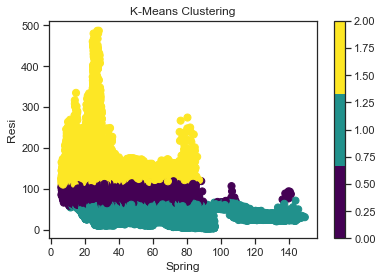

In [101]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(cluster_result['Max_sp'],cluster_result['Resi'],
                     c=cluster_result['cluster_labels'],cmap=plt.cm.get_cmap('viridis', 3),s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Spring')
ax.set_ylabel('Resi')
plt.colorbar(scatter)
plt.show()

In [102]:
cluster1['ID'].value_counts()

de1-038be21-01a0(1080220)#r10801153-p04-1.xls.csv            1601
de1-042bb56-01a0(1080218)#r10801118-p05-1.xls.csv            1592
pe1-076ef27-01f0(1080213)r10801088-p04-回測-1.xls.csv          1451
le3-050bb33-01a0(1080214)#10801093-p04-2.xls.csv             1406
de1-031be50-01c0(1080422)#r10804055-p07--1.xls.csv           1386
le3-050bb33-01a0(1080214)#10801093-p04-1.xls.csv             1359
de1-083ff82-01f0(1080220)#r10801032-p04-1.xls.csv            1267
le3-050bb33-01a0(1080214)#10801093-p04-01.xls.csv            1224
pe4-026bd25-01a0(1080211)#r10801098-p08-02.xls.csv           1210
de1-031be50-01c0(1080422)#r10804055-p07-01.xls.csv           1186
de1-083ff82-01f0(1080201)#r10801032-p09-1.xls.csv            1186
de1-026bf40-03f0(1080227)#r10801113-p09-1.xls.csv            1173
de1-083ff82-01f0(1080201)#r10801032-p05-回測-1.xls.csv         1163
de1-083ff82-01f0(1080220)#r10801032-p04-02.xls.csv           1104
pe4-026bd25-01a0(1080211)#r10801098-p08-01.xls.csv           1098
de1-083ff8

In [138]:
# Merge
series=[]

for i in cluster1['ID']:
    if 'de' in i[0:2]:
        DE=[i,'DE']
        series.append(DE)
    elif 'cs' in i[0:2]:
        CS=[i,'CS']
        series.append(CS)
    elif 'pe' in i[0:2]:
        PE=[i,'PE']
        series.append(PE)
    elif 'we' in i[0:2]:
        WE=[i,'WE']
        series.append(WE)
    else:
        OTHERS=[i,'OTHERS']
        series.append(OTHERS)
   
Newcluster1=pd.DataFrame(series,columns=['ID','Materials'])
cluster1=cluster1.reset_index(drop=True)
res = pd.concat([Newcluster1['Materials'],cluster1],axis=1)
res.head()

,Materials,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke,cluster_labels
0,CS,cs106005m0(1080313)#r10802081-p06-320pcs.xls.csv,4-1,82.1,1.996,81.1,2.000,67.9,2.000,69.5,1.754,0
1,CS,cs106005m0(1080313)#r10802081-p06-320pcs.xls.csv,6-1,87.3,1.992,85.8,2.000,66.2,2.000,67.9,1.834,0
2,CS,cs106005m0(1080313)#r10802081-p06-320pcs.xls.csv,9-1,85.5,1.998,84.5,2.001,70.2,2.001,74.2,1.887,0
3,CS,cs106005m0(1080313)#r10802081-p06-320pcs.xls.csv,10-1,82.5,1.974,81.8,2.000,67.8,2.000,71.3,1.811,0
4,CS,cs106005m0(1080313)#r10802081-p06-320pcs.xls.csv,12-1,81.9,1.990,81.5,2.001,66.5,2.001,72.4,1.752,0


In [139]:
cluster2['ID'].value_counts()

pe4-056df20-10f0(1080327)#r10803009-p05-2.xls.csv            1666
pe4-056df20-10f0(1080327)#r10803009-p05-1.xls.csv            1652
pe4-056df20-10f0(1080122)#r10801054-p05-2.xls.csv            1649
pe3-030el25-03a0(1080506)#r10804105-p04-1.xls.csv            1634
de4-052ef23-04f0(1080426)#r10712081-p06-2.xls.csv            1621
de4-052ef23-04f0(1080502)#r10712081-p07-回測-1.xls.csv         1605
le3-050bb33-01a0(1080214)#r10801093-p05-01.xls.csv           1603
e-de2-085de10-02a0(1080215)#r201901081-p06-02.xls.csv        1598
le3-050bb33-01a0(1080124)#r10801049-p04-1.xls.csv            1593
le3-050bb33-01a0(1080123)#r10801049-p04-1.xls.csv            1591
pe4-056df2010f0(1080320)#r10803009-p08-回測-1.xls.csv          1588
pe4-056df20-10f0(1080327)#r10803009-p06-1.xls.csv            1571
pe3-031ef22-03f0(1080503)#r10804100-p06-1.xls.csv            1562
e-de2-085de10-02a0(1080218)#r201901081-p06-1.xls.csv         1559
pe4-056df20-10f0(1080119)#r10801054-p05-01.xls.csv           1558
pe3-031ef2

In [140]:
# Merge
series=[]

for i in cluster2['ID']:
    if 'de' in i[0:2]:
        DE=[i,'DE']
        series.append(DE)
    elif 'cs' in i[0:2]:
        CS=[i,'CS']
        series.append(CS)
    elif 'pe' in i[0:2]:
        PE=[i,'PE']
        series.append(PE)
    elif 'we' in i[0:2]:
        WE=[i,'WE']
        series.append(WE)
    else:
        OTHERS=[i,'OTHERS']
        series.append(OTHERS)
   
Newcluster2=pd.DataFrame(series,columns=['ID','Materials'])
cluster2=cluster2.reset_index(drop=True)
res2 = pd.concat([Newcluster2['Materials'],cluster2],axis=1)
res2.head()

,Materials,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke,cluster_labels
0,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,1-1,114.5,1.995,113.2,2.001,44.1,2.001,47.3,1.503,1
1,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,2-1,118.7,1.991,117.1,2.000,44.9,2.000,48.2,1.506,1
2,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,3-1,111.2,1.999,110.8,2.000,43.2,2.000,48.4,1.957,1
3,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,4-1,120.1,1.999,114.8,2.000,39.1,2.000,42.4,1.508,1
4,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,5-1,118.0,1.999,114.5,2.000,38.8,2.000,43.8,1.504,1


In [141]:
cluster3['ID'].value_counts()

de1-026be50-01a0(1080223)#r10801148-p06-02.xls.csv            1599
de1-026be50-01a0(1080223)#r10801148-p06-01.xls.csv            1590
de1-025bb10-02a0(1080416)#r10804004-p05-01.xls.csv            1578
de1-026be50-01a01080218)#r10801148-p08-01.xls.csv             1564
de1-026be50-01a0(1080223)#r10801148-p05-01.xls.csv            1552
de1-026be50-01a0(1080223)#r10801148-p06-1.xls.csv             1542
de1-025bb10-02a0(1080417)#r10804004-p06-01.xls.csv            1533
de1-025bb10-02a0(1080416)#r10804004-p05-02.xls.csv            1532
de1-026be50-01a0(1080223)#r10801148-p05-02.xls.csv            1509
de1-026be50-01a0(1080222)#r10801148-p06-01.xls.csv            1505
de1-026be50-01a0(1080223)#r10801148-p05-1.xls.csv             1454
de1-026be50-01a0(1080222)#r10801148-p05-02.xls.csv            1444
de1-020be40-05a0(1080410)#r10802111-p07-1.xls.csv             1423
de1-026be50-01a0(1080222)#r10801148-p05-01.xls.csv            1417
de1-026df40-03f0(1080425)#r10804019-p03-回測-01.xls.csv         

In [142]:
series=[]

for i in cluster3['ID']:
    if 'de' in i[0:2]:
        DE=[i,'DE']
        series.append(DE)
    elif 'cs' in i[0:2]:
        CS=[i,'CS']
        series.append(CS)
    elif 'pe' in i[0:2]:
        PE=[i,'PE']
        series.append(PE)
    elif 'we' in i[0:2]:
        WE=[i,'WE']
        series.append(WE)
    else:
        OTHERS=[i,'OTHERS']
        series.append(OTHERS)
   
Newcluster3=pd.DataFrame(series,columns=['ID','Materials'])
cluster3=cluster3.reset_index(drop=True)
res3 = pd.concat([Newcluster3['Materials'],cluster3],axis=1)
res3.head()

,Materials,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke,cluster_labels
0,CS,cs97198m2(1080123)#r10801039-p06-1.xls.csv,10-2,28.6,0.550,28.5,0.551,134.3,0.551,140.2,0.542,2
1,CS,cs97198m2(1080123)#r10801039-p06-1.xls.csv,10-3,28.3,0.550,28.2,0.551,131.5,0.551,135.6,0.542,2
2,CS,cs97198m2(1080123)#r10801039-p06-1.xls.csv,14-3,28.5,0.546,28.1,0.551,127.5,0.551,133.7,0.548,2
3,CS,cs97198m2(1080123)#r10801039-p06-1.xls.csv,35-3,28.2,0.546,27.8,0.551,119.3,0.551,141.5,0.411,2
4,CS,cs97198m2(1080123)#r10801039-p06-1.xls.csv,45-1,29.2,0.538,29.2,0.551,118.7,0.551,146.4,0.413,2


In [149]:
res['Materials'].value_counts()

DE        135787
PE         60831
OTHERS     10386
CS          8373
WE          3346
Name: Materials, dtype: int64

In [150]:
res2['Materials'].value_counts()

PE        272773
DE        230661
OTHERS     27915
CS         12732
WE          6336
Name: Materials, dtype: int64

In [155]:
res3['Materials'].value_counts()

DE        69646
PE         9542
WE          308
OTHERS      196
CS           86
Name: Materials, dtype: int64

# 15. 從料號著手檢視彈力阻值

In [157]:
series2=[]

for i in df2['ID']:
    if 'de' in i[0:2]:
        DE=[i,'DE']
        series2.append(DE)
    elif 'cs' in i[0:2]:
        CS=[i,'CS']
        series2.append(CS)
    elif 'pe' in i[0:2]:
        PE=[i,'PE']
        series2.append(PE)
    elif 'we' in i[0:2]:
        WE=[i,'WE']
        series2.append(WE)
    else:
        OTHERS=[i,'OTHERS']
        series2.append(OTHERS)
        
check_materials=pd.DataFrame(series2,columns=['ID','Materials'])
dff=df2.reset_index(drop=True)
check_materials_data = pd.concat([check_materials['Materials'],dff],axis=1)
check_materials_data

,Materials,ID,Specification,Max_sp,Max_sp_stroke,reMax_sp,reMax_sp_stroke,Resi,Resi_stroke,rResi,rResi_stroke
0,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,1-1,114.5,1.995,113.2,2.001,44.1,2.001,47.3,1.503
1,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,2-1,118.7,1.991,117.1,2.000,44.9,2.000,48.2,1.506
2,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,3-1,111.2,1.999,110.8,2.000,43.2,2.000,48.4,1.957
3,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,4-1,120.1,1.999,114.8,2.000,39.1,2.000,42.4,1.508
4,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,5-1,118.0,1.999,114.5,2.000,38.8,2.000,43.8,1.504
5,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,8-1,119.6,1.997,118.2,2.000,45.0,2.000,48.5,1.774
6,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,9-1,114.0,1.999,113.2,2.001,40.7,2.001,44.7,1.506
7,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,10-1,116.4,1.999,113.4,2.000,38.6,2.000,42.8,1.501
8,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,13-1,111.2,2.000,111.2,2.000,42.9,2.000,49.8,1.501
9,CS,cs106004m1(1080313)#r10802086-p05-1.xls.csv,15-1,122.7,1.999,118.6,2.001,41.6,2.001,45.7,1.501


In [167]:
CS=check_materials_data.loc[check_materials_data['Materials']=='CS',['Max_sp','Resi']]
WE=check_materials_data.loc[check_materials_data['Materials']=='WE',['Max_sp','Resi']]
PE=check_materials_data.loc[check_materials_data['Materials']=='PE',['Max_sp','Resi']]
DE=check_materials_data.loc[check_materials_data['Materials']=='DE',['Max_sp','Resi']]
OTHERS=check_materials_data.loc[check_materials_data['Materials']=='OTHERS',['Max_sp','Resi']]

In [169]:
CS.describe()

,Max_sp,Resi
count,21191.000000,21191.000000
mean,58.405691,57.878873
std,38.766939,18.398689
min,25.600000,14.100000
25%,29.900000,42.900000
50%,31.100000,57.100000
75%,110.100000,69.100000
max,143.900000,149.900000


In [170]:
WE.describe()

,Max_sp,Resi
count,9990.000000,9990.000000
mean,33.460070,58.649940
std,2.317653,23.700883
min,28.700000,23.100000
25%,31.400000,41.000000
50%,33.500000,51.500000
75%,34.600000,72.400000
max,47.600000,172.600000


In [171]:
PE.describe()

,Max_sp,Resi
count,343146.000000,343146.000000
mean,29.546954,49.886753
std,4.452783,23.811624
min,8.100000,11.700000
25%,28.700000,35.200000
50%,29.900000,43.600000
75%,31.300000,55.900000
max,47.900000,334.800000


In [172]:
DE.describe()

,Max_sp,Resi
count,436094.000000,436094.000000
mean,35.742682,70.023342
std,16.742892,42.113434
min,6.100000,3.400000
25%,26.400000,39.200000
50%,31.900000,58.000000
75%,46.200000,91.500000
max,149.200000,486.600000


In [173]:
OTHERS.describe()

,Max_sp,Resi
count,38497.000000,38497.000000
mean,48.846591,49.991373
std,22.925706,19.078846
min,18.500000,11.900000
25%,32.600000,38.200000
50%,33.700000,49.200000
75%,79.000000,62.100000
max,89.900000,274.400000
